<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
pd.__version__

'2.0.1'

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [4]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

In [5]:
#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")

In [6]:
#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")

In [7]:
#Importation du fichier sous_nutrition.csv
ss_nutrition = pd.read_csv("sous_nutrition.csv")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [8]:
#Afficher les dimensions du dataframe population
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [9]:
#Consulter le nombre de colonnes
population.shape

(1416, 3)

In [10]:
#La nature des données dans chacune des colonnes
population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [11]:
#Le nombre de valeurs présentes dans chacune des colonnes
population.count()

Zone      1416
Année     1416
Valeur    1416
dtype: int64

In [12]:
#Affichage les 5 premières lignes de la table
population.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [13]:
# convertion de la population en million
population["Valeur"] = population["Valeur"] * 1000
population["Valeur"]

0       32269589.0
1       33370794.0
2       34413603.0
3       35383032.0
4       36296113.0
           ...    
1411    13586707.0
1412    13814629.0
1413    14030331.0
1414    14236595.0
1415    14438802.0
Name: Valeur, Length: 1416, dtype: float64

In [14]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={"Valeur":"Population"})

In [15]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [16]:
#Afficher les dimensions du dataset
dispo_alimentaire.shape

(15605, 18)

In [17]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} lignes".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonnes".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 lignes
Le tableau comporte 18 colonnes


In [18]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [19]:
#remplacement des NaN dans le dataset par des 0 (méthode fillna())
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [20]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [21]:
dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [22]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          15605 non-null  float64
 4   Autres Utilisations                                            15605 non-null  float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 15605 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         15605 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [23]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
list_columns = ['Aliments pour animaux', 'Autres Utilisations',
            'Disponibilité intérieure',
            'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
            'Semences', 'Traitement', 'Variation de stock']

dispo_alimentaire[list_columns] = dispo_alimentaire[list_columns] * 1000000

In [24]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [25]:
aide_alimentaire.shape

(1475, 4)

In [26]:
#Afficher les dimensions du dataframe aide alimentaire
print("Le tableau comporte {} lignes".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonnes".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 lignes
Le tableau comporte 4 colonnes


In [27]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(aide_alimentaire.shape[1]))

Le tableau comporte 4 colonnes


In [28]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [29]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={"Pays bénéficiaire":"Zone"})
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [30]:
# renommer la colonne Valeur par Aide_alimentaire_Kg
aide_alimentaire = aide_alimentaire.rename(columns={"Valeur":"Aide_alimentaire_Kg"})
aide_alimentaire.head(1)

,Zone,Année,Produit,Aide_alimentaire_Kg
0,Afghanistan,2013,Autres non-céréales,682


In [31]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire["Aide_alimentaire_Kg"] = aide_alimentaire["Aide_alimentaire_Kg"] * 1000

In [32]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Aide_alimentaire_Kg
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [33]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(ss_nutrition.shape[0]))
print("Le tableau comporte {} colonnes".format(ss_nutrition.shape[1]))

Le tableau comporte 1218 lignes
Le tableau comporte 3 colonnes


In [34]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(ss_nutrition.shape[1]))

Le tableau comporte 3 colonnes


In [35]:
#Afficher les 5 premières lignes de la table
ss_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [36]:
# renommer la colonne "Valeur" en "sous_nutrition"
ss_nutrition = ss_nutrition.rename(columns={"Valeur":"sous_nutrition"})
ss_nutrition

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [37]:
#Conversion de la colonne sous_nutrition en numérique
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
ss_nutrition["sous_nutrition"] = pd.to_numeric(ss_nutrition["sous_nutrition"], errors="coerce")

In [38]:
# vérification du format de la colonne sous_nutrition
ss_nutrition["sous_nutrition"].dtypes

dtype('float64')

In [39]:
#Puis remplacement des NaN en 0
ss_nutrition["sous_nutrition"] = ss_nutrition["sous_nutrition"].fillna(0)
ss_nutrition

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [40]:
#Multiplication de la colonne sous_nutrition par 1000000
ss_nutrition["sous_nutrition"] = ss_nutrition["sous_nutrition"] * 1000000

In [41]:
#Afficher les 5 premières lignes de la table
ss_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [42]:
# Scinder la colonne "Année" en année médiane et créer une nouvelle colonne "Année médiane"
ss_nutrition[['Année début', 'Année fin']] = ss_nutrition['Année'].str.split('-', expand=True)
ss_nutrition['Année médiane'] = ss_nutrition[['Année début', 'Année fin']].astype(int).mean(axis=1).astype(int)

In [43]:
ss_nutrition.head()

,Zone,Année,sous_nutrition,Année début,Année fin,Année médiane
0,Afghanistan,2012-2014,8600000.0,2012,2014,2013
1,Afghanistan,2013-2015,8800000.0,2013,2015,2014
2,Afghanistan,2014-2016,8900000.0,2014,2016,2015
3,Afghanistan,2015-2017,9700000.0,2015,2017,2016
4,Afghanistan,2016-2018,10500000.0,2016,2018,2017


In [44]:
# Supprimer les colonnes non nécessaires
ss_nutrition = ss_nutrition.drop(columns=['Année', 'Année début', 'Année fin'])

In [45]:
# Afficher le nouveau dataframe
ss_nutrition

,Zone,sous_nutrition,Année médiane
0,Afghanistan,8600000.0,2013
1,Afghanistan,8800000.0,2014
2,Afghanistan,8900000.0,2015
3,Afghanistan,9700000.0,2016
4,Afghanistan,10500000.0,2017
...,...,...,...
1213,Zimbabwe,0.0,2014
1214,Zimbabwe,0.0,2015
1215,Zimbabwe,0.0,2016
1216,Zimbabwe,0.0,2017


In [46]:
# convertir la colonne "Année médiane" en date
ss_nutrition['Année médiane'] = pd.to_datetime(ss_nutrition['Année médiane'], format='%Y')

In [47]:
ss_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Zone            1218 non-null   object        
 1   sous_nutrition  1218 non-null   float64       
 2   Année médiane   1218 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 28.7+ KB


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [48]:
population['Année'] = pd.to_datetime(population['Année'], format='%Y')

In [49]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Zone        1416 non-null   object        
 1   Année       1416 non-null   datetime64[ns]
 2   Population  1416 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.3+ KB


In [50]:
population_2017 = population[ population["Année"].dt.year == 2017 ]
population_2017

,Zone,Année,Population
4,Afghanistan,2017-01-01,36296113.0
10,Afrique du Sud,2017-01-01,57009756.0
16,Albanie,2017-01-01,2884169.0
22,Algérie,2017-01-01,41389189.0
28,Allemagne,2017-01-01,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017-01-01,29402484.0
1396,Viet Nam,2017-01-01,94600648.0
1402,Yémen,2017-01-01,27834819.0
1408,Zambie,2017-01-01,16853599.0


In [51]:
ss_nutrition_2017_df = ss_nutrition[ ss_nutrition["Année médiane"].dt.year == 2017 ]
ss_nutrition_2017_df

,Zone,sous_nutrition,Année médiane
4,Afghanistan,10500000.0,2017-01-01
10,Afrique du Sud,3100000.0,2017-01-01
16,Albanie,100000.0,2017-01-01
22,Algérie,1300000.0,2017-01-01
28,Allemagne,0.0,2017-01-01
...,...,...,...
1192,Venezuela (République bolivarienne du),8000000.0,2017-01-01
1198,Viet Nam,6500000.0,2017-01-01
1204,Yémen,0.0,2017-01-01
1210,Zambie,0.0,2017-01-01


In [65]:
# JOINTURE ENTRE POPULATION ET SOUS-NUTRITION ANNEE 2017
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
ratio_population_en_sous_nutrition_df = population_2017.merge(ss_nutrition_2017_df, on="Zone", how="inner")

In [66]:
ratio_population_en_sous_nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Zone            203 non-null    object        
 1   Année           203 non-null    datetime64[ns]
 2   Population      203 non-null    float64       
 3   sous_nutrition  203 non-null    float64       
 4   Année médiane   203 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 8.1+ KB


In [67]:
# AFFICHAGE DU DATASET AVEC JOINTURE
ratio_population_en_sous_nutrition_df.head()

,Zone,Année,Population,sous_nutrition,Année médiane
0,Afghanistan,2017-01-01,36296113.0,10500000.0,2017-01-01
1,Afrique du Sud,2017-01-01,57009756.0,3100000.0,2017-01-01
2,Albanie,2017-01-01,2884169.0,100000.0,2017-01-01
3,Algérie,2017-01-01,41389189.0,1300000.0,2017-01-01
4,Allemagne,2017-01-01,82658409.0,0.0,2017-01-01


In [74]:
# PROPORTION DE SOUS-NUTRITION PAR RAPPORT A LA POPULATION TOTALE
ratio_population_en_sous_nutrition_df["ratio_sous_nutrition_mondiale"] = ((ratio_population_en_sous_nutrition_df['sous_nutrition'].sum() / ratio_population_en_sous_nutrition_df['Population'].sum()) * 100).round(2)
ratio_population_en_sous_nutrition_df.head()

,Zone,Année,Population,sous_nutrition,Année médiane,ratio_sous_nutrition_mondiale
0,Afghanistan,2017-01-01,36296113.0,10500000.0,2017-01-01,7.1
1,Afrique du Sud,2017-01-01,57009756.0,3100000.0,2017-01-01,7.1
2,Albanie,2017-01-01,2884169.0,100000.0,2017-01-01,7.1
3,Algérie,2017-01-01,41389189.0,1300000.0,2017-01-01,7.1
4,Allemagne,2017-01-01,82658409.0,0.0,2017-01-01,7.1


In [75]:
#print(f"En 2017, la sous-nutrition globale représentait {ratio_sous_nutrition_mondiale} % de la population mondiale.")

In [85]:
# Calcul du pourcentage de sous-nutrition par pays
ratio_population_en_sous_nutrition_df['Pourcentage_Sous_Nutrition'] = ((ratio_population_en_sous_nutrition_df['sous_nutrition'] / ratio_population_en_sous_nutrition_df['Population']) * 100).round(2)
ratio_population_en_sous_nutrition_df.sort_values(by="Pourcentage_Sous_Nutrition", ascending=False).head(20)

,Zone,Année,Population,sous_nutrition,Année médiane,ratio_sous_nutrition_mondiale,Pourcentage_Sous_Nutrition
78,Haïti,2017-01-01,10982366.0,5300000.0,2017-01-01,7.1,48.26
157,République populaire démocratique de Corée,2017-01-01,25429825.0,12000000.0,2017-01-01,7.1,47.19
108,Madagascar,2017-01-01,25570512.0,10500000.0,2017-01-01,7.1,41.06
103,Libéria,2017-01-01,4702226.0,1800000.0,2017-01-01,7.1,38.28
100,Lesotho,2017-01-01,2091534.0,800000.0,2017-01-01,7.1,38.25
183,Tchad,2017-01-01,15016753.0,5700000.0,2017-01-01,7.1,37.96
161,Rwanda,2017-01-01,11980961.0,4200000.0,2017-01-01,7.1,35.06
121,Mozambique,2017-01-01,28649018.0,9400000.0,2017-01-01,7.1,32.81
186,Timor-Leste,2017-01-01,1243258.0,400000.0,2017-01-01,7.1,32.17
0,Afghanistan,2017-01-01,36296113.0,10500000.0,2017-01-01,7.1,28.93


In [78]:
#Calcul et affichage du nombre de personnes en état de sous nutrition (année 2017) et son %
nombre_total_humains_sous_nutrition_2017 = ratio_population_en_sous_nutrition_df["sous_nutrition"].sum()
#print(f"Nombre total d'êtres humains en sous-nutrition : {nombre_total_humains_sous_nutrition_2017}, soit {ratio_sous_nutrition_mondiale}% de la population mondiale !")

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [79]:
#Combien mange en moyenne un être humain ? Source => https://fr.wikipedia.org/wiki/Ration_alimentaire
# la ration alimentaire moyenne nécessaire est de 2 500 kcal/personne/jour. 

# matières grasse :
# Selon wikipedia : 65g pour une femme et 90g pour un homme

# protéines :
# selon wikipédia et la FAO : 49g de protéines pour les hommes adultes et 41g pour les femmes (47 si enceinte et 58,5 si allaitante)


A/ Jointure

In [80]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
df_2017 = dispo_alimentaire.merge(population, on="Zone", how="inner")

In [81]:
#Affichage du nouveau dataframe
df_2017.sample(3)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
72004,République populaire démocratique de Corée,Oeufs,animale,0.0,0.0,19.0,4.68,1.31,1.48,125000000.0,0.0,0.0,117000000.0,6000000.0,125000000.0,2000000.0,0.0,0.0,2017-01-01,25429825.0
29049,France,"Alcool, non Comestible",vegetale,0.0,56000000.0,0.0,0.00,0.00,0.00,56000000.0,693000000.0,174000000.0,0.0,0.0,575000000.0,0.0,0.0,0.0,2016-01-01,64667596.0
14678,Bénin,Abats Comestible,animale,0.0,0.0,3.0,0.88,0.08,0.43,9000000.0,0.0,0.0,9000000.0,0.0,9000000.0,0.0,0.0,0.0,2015-01-01,10575952.0


B/ Création de la colonne "dispo_kcal" avec calcul des kcal disponibles mondialement

In [82]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
df_2017['dispo_kcal'] = df_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * df_2017['Population']
df_2017.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2013-01-01,32269589.0,161347945.0
1,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2014-01-01,33370794.0,166853970.0
2,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2015-01-01,34413603.0,172068015.0
3,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2016-01-01,35383032.0,176915160.0
4,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017-01-01,36296113.0,181480565.0


C/ Calcul du nombre d'humains pouvant être nourris

In [83]:
df_2017["Année"] = pd.to_datetime(df_2017['Année'], format='%Y')

In [84]:
df_2017.dtypes

Zone                                                                     object
Produit                                                                  object
Origine                                                                  object
Aliments pour animaux                                                   float64
Autres Utilisations                                                     float64
Disponibilité alimentaire (Kcal/personne/jour)                          float64
Disponibilité alimentaire en quantité (kg/personne/an)                  float64
Disponibilité de matière grasse en quantité (g/personne/jour)           float64
Disponibilité de protéines en quantité (g/personne/jour)                float64
Disponibilité intérieure                                                float64
Exportations - Quantité                                                 float64
Importations - Quantité                                                 float64
Nourriture                              

In [86]:
# Filtrage conditionnel avec dt.year pour se restreindre à l'année 2017
df_2017 = df_2017[ df_2017["Année"].dt.year == 2017 ]

In [87]:
disponibilite_totale = df_2017["dispo_kcal"].sum().round(2)
disponibilite_totale

20918984627331.0

In [88]:
# nombre moyen de calories consommées par personne par jour
nombre_moyen_calories = 2500

In [89]:
# calcul du nombre d'humains pouvant être nourris
nombre_humains_nourris = (disponibilite_totale / nombre_moyen_calories).round()

In [90]:
print(f"En 2017, on aurait pu nourrir approximativement : {nombre_humains_nourris} d'êtres humains !\nSelon les estimations de l'ONU, la population mondiale en 2017 était d'environs : 7,44 milliards d'individus.")

En 2017, on aurait pu nourrir approximativement : 8367593851.0 d'êtres humains !
Selon les estimations de l'ONU, la population mondiale en 2017 était d'environs : 7,44 milliards d'individus.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [91]:
#Transfert des données avec les végétaux dans un nouveau dataframe
vegetal_df = df_2017[ df_2017["Origine"] == "vegetale" ]
vegetal_df.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
10,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017-01-01,36296113.0,36296113.0
16,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017-01-01,36296113.0,36296113.0
22,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-01,36296113.0,0.0
28,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017-01-01,36296113.0,145184452.0
40,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,...,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,2017-01-01,36296113.0,0.0


In [92]:
#Calcul du nombre de kcal disponible pour les végétaux
disponibilite_kcal_vegetaux = vegetal_df["dispo_kcal"].sum()
disponibilite_kcal_vegetaux

17260764211501.0

In [93]:
# Calcul du nombre d'humains pouvant être nourris avec les végétaux
# Dans l'hypothèse qu'un adulte aurait besoin de 2500 Kcal/jour, on peut en déduire :
humans_nourished_only_vegetables = (disponibilite_kcal_vegetaux / nombre_moyen_calories).round(2)


In [94]:
print(f"En 2017, on aurait pu nourrir {humans_nourished_only_vegetables} individus : soit 6,9 milliards d'individus !!\nSelon les estimations de l'ONU, la population mondiale en 2017 était d'environs : 7,44 milliards d'individus.")

En 2017, on aurait pu nourrir 6904305684.6 individus : soit 6,9 milliards d'individus !!
Selon les estimations de l'ONU, la population mondiale en 2017 était d'environs : 7,44 milliards d'individus.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [95]:
# Calcul de la disponibilité intérieure totale
food_availability = df_2017["Disponibilité intérieure"].sum()
food_availability


9733927000000.0

In [96]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes 'Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']
colonnes = ["Aliments pour animaux", "Pertes", "Nourriture", "Semences", "Traitement", "Autres Utilisations"]

# Parcours des colonnes
for c in colonnes:
    total_par_colonne = ((df_2017[c].sum() / food_availability) * 100).round(2)
    print(c)
    print(f"% de '{c}' par rapport à la disponibilité intérieure : {total_par_colonne} %")
    print("\n")

Aliments pour animaux
% de 'Aliments pour animaux' par rapport à la disponibilité intérieure : 13.23 %


Pertes
% de 'Pertes' par rapport à la disponibilité intérieure : 4.65 %


Nourriture
% de 'Nourriture' par rapport à la disponibilité intérieure : 49.37 %


Semences
% de 'Semences' par rapport à la disponibilité intérieure : 1.58 %


Traitement
% de 'Traitement' par rapport à la disponibilité intérieure : 22.45 %


Autres Utilisations
% de 'Autres Utilisations' par rapport à la disponibilité intérieure : 8.82 %




<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [97]:
# Création d'une liste avec toutes les cereales
liste_cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"]

# Création d'un nouveau DataFrame en filtrant les données pour ne garder que les céréales
muesli_df_2017 = df_2017[df_2017["Produit"].isin(liste_cereales)]

# Affichage des premières lignes du nouveau DataFrame
muesli_df_2017.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
46,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,...,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,2017-01-01,36296113.0,4.968938e+10
76,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017-01-01,36296113.0,0.000000e+00
196,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,...,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,2017-01-01,36296113.0,7.622184e+08
208,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,...,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,2017-01-01,36296113.0,1.088883e+08
244,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,...,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,2017-01-01,36296113.0,9.436989e+08


In [98]:
# Calcul de la disponibilité intérieure totale des céréales
muesli_availability = muesli_df_2017["Disponibilité intérieure"].sum()
print(f"Somme globale des céréales disponibles sur terre : {muesli_availability}")

Somme globale des céréales disponibles sur terre : 2378371000000.0


In [99]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes 'Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']
colonnes = ["Aliments pour animaux", "Pertes", "Nourriture", "Semences", "Traitement", "Autres Utilisations"]

for i in colonnes:
    ratio = ((muesli_df_2017[i].sum() / muesli_availability) * 100).round(0)
    print(i)
    print(f"Part des céréales pour {i}: {ratio} %")
    print("\n")

Aliments pour animaux
Part des céréales pour Aliments pour animaux: 36.0 %


Pertes
Part des céréales pour Pertes: 4.0 %


Nourriture
Part des céréales pour Nourriture: 43.0 %


Semences
Part des céréales pour Semences: 3.0 %


Traitement
Part des céréales pour Traitement: 4.0 %


Autres Utilisations
Part des céréales pour Autres Utilisations: 10.0 %




<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [100]:
#Création de la colonne proportion par pays
ratio_population_en_sous_nutrition_df["Proportion_sous_nutrition_par pays"] = ((ratio_population_en_sous_nutrition_df["sous_nutrition"] / ratio_population_en_sous_nutrition_df["Population"]) * 100).round(2)

In [101]:
ratio_population_en_sous_nutrition_df.head()

,Zone,Année,Population,sous_nutrition,Année médiane,ratio_sous_nutrition_mondiale,Pourcentage_Sous_Nutrition,Proportion_sous_nutrition_par pays
0,Afghanistan,2017-01-01,36296113.0,10500000.0,2017-01-01,7.1,28.93,28.93
1,Afrique du Sud,2017-01-01,57009756.0,3100000.0,2017-01-01,7.1,5.44,5.44
2,Albanie,2017-01-01,2884169.0,100000.0,2017-01-01,7.1,3.47,3.47
3,Algérie,2017-01-01,41389189.0,1300000.0,2017-01-01,7.1,3.14,3.14
4,Allemagne,2017-01-01,82658409.0,0.0,2017-01-01,7.1,0.00,0.00


In [102]:
# Classement par ordre de sous-nutrition plus importante à la moins importante par pays
data_sorted = ratio_population_en_sous_nutrition_df.sort_values(by="Proportion_sous_nutrition_par pays", ascending=False)
data_sorted.head()

,Zone,Année,Population,sous_nutrition,Année médiane,ratio_sous_nutrition_mondiale,Pourcentage_Sous_Nutrition,Proportion_sous_nutrition_par pays
78,Haïti,2017-01-01,10982366.0,5300000.0,2017-01-01,7.1,48.26,48.26
157,République populaire démocratique de Corée,2017-01-01,25429825.0,12000000.0,2017-01-01,7.1,47.19,47.19
108,Madagascar,2017-01-01,25570512.0,10500000.0,2017-01-01,7.1,41.06,41.06
103,Libéria,2017-01-01,4702226.0,1800000.0,2017-01-01,7.1,38.28,38.28
100,Lesotho,2017-01-01,2091534.0,800000.0,2017-01-01,7.1,38.25,38.25


In [103]:
# Les 10 pays les plus touchés par la ss-nutrition
data_sorted.iloc[0:10, :]

,Zone,Année,Population,sous_nutrition,Année médiane,ratio_sous_nutrition_mondiale,Pourcentage_Sous_Nutrition,Proportion_sous_nutrition_par pays
78,Haïti,2017-01-01,10982366.0,5300000.0,2017-01-01,7.1,48.26,48.26
157,République populaire démocratique de Corée,2017-01-01,25429825.0,12000000.0,2017-01-01,7.1,47.19,47.19
108,Madagascar,2017-01-01,25570512.0,10500000.0,2017-01-01,7.1,41.06,41.06
103,Libéria,2017-01-01,4702226.0,1800000.0,2017-01-01,7.1,38.28,38.28
100,Lesotho,2017-01-01,2091534.0,800000.0,2017-01-01,7.1,38.25,38.25
183,Tchad,2017-01-01,15016753.0,5700000.0,2017-01-01,7.1,37.96,37.96
161,Rwanda,2017-01-01,11980961.0,4200000.0,2017-01-01,7.1,35.06,35.06
121,Mozambique,2017-01-01,28649018.0,9400000.0,2017-01-01,7.1,32.81,32.81
186,Timor-Leste,2017-01-01,1243258.0,400000.0,2017-01-01,7.1,32.17,32.17
0,Afghanistan,2017-01-01,36296113.0,10500000.0,2017-01-01,7.1,28.93,28.93


In [104]:
ss_nutrition_10_pays_plus_atteints = data_sorted["Zone"].tolist()[0:10]
print(f"Les 10 pays les plus touchés par la sous-nutrition en 2017, sont : {ss_nutrition_10_pays_plus_atteints}")

Les 10 pays les plus touchés par la sous-nutrition en 2017, sont : ['Haïti', 'République populaire démocratique de Corée', 'Madagascar', 'Libéria', 'Lesotho', 'Tchad', 'Rwanda', 'Mozambique', 'Timor-Leste', 'Afghanistan']


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [105]:
#calcul du total de l'aide alimentaire par pays
total_aide_alimentaire_par_pays = aide_alimentaire.groupby("Zone").agg( {'Aide_alimentaire_Kg': 'sum'} )

In [106]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
list_of_10 = total_aide_alimentaire_par_pays.sort_values(by='Aide_alimentaire_Kg', ascending=False).iloc[:10].reset_index()
list_of_10

,Zone,Aide_alimentaire_Kg
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000


In [107]:
top_5_countries = list_of_10["Zone"].tolist()[:5]
print(top_5_countries)

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [108]:
# suppression de la colonne "Produit"
aide_alimentaire = aide_alimentaire.drop(columns="Produit")

In [109]:
aide_alimentaire.columns

Index(['Zone', 'Année', 'Aide_alimentaire_Kg'], dtype='object')

In [110]:
aide_alimentaire

,Zone,Année,Aide_alimentaire_Kg
0,Afghanistan,2013,682000
1,Afghanistan,2014,335000
2,Afghanistan,2013,39224000
3,Afghanistan,2014,15160000
4,Afghanistan,2013,40504000
...,...,...,...
1470,Zimbabwe,2015,96000
1471,Zimbabwe,2013,5022000
1472,Zimbabwe,2014,2310000
1473,Zimbabwe,2015,306000


In [111]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
evolution = aide_alimentaire.groupby( ["Zone", "Année"] ).sum().reset_index()

In [112]:
evolution.columns

Index(['Zone', 'Année', 'Aide_alimentaire_Kg'], dtype='object')

In [113]:
evolution

,Zone,Année,Aide_alimentaire_Kg
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [114]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
top_5_countries

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [115]:
# Liste des pays à filtrer
pays_filtre = top_5_countries

# Filtrer le DataFrame original en fonction des pays, méthode de filtre avec isin()
filtered_df = evolution[evolution['Zone'].isin(pays_filtre)]

# Afficher le DataFrame filtré
print(filtered_df)

                          Zone  Année  Aide_alimentaire_Kg
157  République arabe syrienne   2013            563566000
158  République arabe syrienne   2014            651870000
159  République arabe syrienne   2015            524949000
160  République arabe syrienne   2016            118558000
189                     Soudan   2013            330230000
190                     Soudan   2014            321904000
191                     Soudan   2015             17650000
192              Soudan du Sud   2013            196330000
193              Soudan du Sud   2014            450610000
194              Soudan du Sud   2015             48308000
214                      Yémen   2013            264764000
215                      Yémen   2014            103840000
216                      Yémen   2015            372306000
217                      Yémen   2016            465574000
225                   Éthiopie   2013            591404000
226                   Éthiopie   2014            5866240

In [116]:
# Mise en forme : Pivoter le DataFrame pour avoir les années comme colonnes
pivot_df = filtered_df.pivot(index='Zone', columns='Année', values='Aide_alimentaire_Kg')
pivot_df

Année,2013,2014,2015,2016
Zone,,,,
République arabe syrienne,563566000.0,651870000.0,524949000.0,118558000.0
Soudan,330230000.0,321904000.0,17650000.0,NaN
Soudan du Sud,196330000.0,450610000.0,48308000.0,NaN
Yémen,264764000.0,103840000.0,372306000.0,465574000.0
Éthiopie,591404000.0,586624000.0,203266000.0,NaN


In [117]:
# Calculer le taux d'évolution entre 2013 et 2015 (Pays concernés : Soudan du Sud, Soudan, Ethiopie)
pivot_df['Taux_evolution_2013_2015'] = (((pivot_df[2015] - pivot_df[2013]) / pivot_df[2013]) * 100).round(2)



In [118]:
# Afficher le DataFrame résultant
pivot_df

Année,2013,2014,2015,2016,Taux_evolution_2013_2015
Zone,,,,,
République arabe syrienne,563566000.0,651870000.0,524949000.0,118558000.0,-6.85
Soudan,330230000.0,321904000.0,17650000.0,NaN,-94.66
Soudan du Sud,196330000.0,450610000.0,48308000.0,NaN,-75.39
Yémen,264764000.0,103840000.0,372306000.0,465574000.0,40.62
Éthiopie,591404000.0,586624000.0,203266000.0,NaN,-65.63


In [119]:
# Calculer le taux d'évolution entre 2013 et 2016 (pays concernés : Syrie et Yemen)
pivot_df['Taux_evolution_2013_2016'] = (((pivot_df[2016] - pivot_df[2013]) / pivot_df[2013]) * 100).round(2)

In [120]:
# Afficher le DataFrame résultant
pivot_df

Année,2013,2014,2015,2016,Taux_evolution_2013_2015,Taux_evolution_2013_2016
Zone,,,,,,
République arabe syrienne,563566000.0,651870000.0,524949000.0,118558000.0,-6.85,-78.96
Soudan,330230000.0,321904000.0,17650000.0,NaN,-94.66,NaN
Soudan du Sud,196330000.0,450610000.0,48308000.0,NaN,-75.39,NaN
Yémen,264764000.0,103840000.0,372306000.0,465574000.0,40.62,75.84
Éthiopie,591404000.0,586624000.0,203266000.0,NaN,-65.63,NaN


In [121]:
# Evolution de ces 5 pays à travers les aides alimentaires :
pivot_df

Année,2013,2014,2015,2016,Taux_evolution_2013_2015,Taux_evolution_2013_2016
Zone,,,,,,
République arabe syrienne,563566000.0,651870000.0,524949000.0,118558000.0,-6.85,-78.96
Soudan,330230000.0,321904000.0,17650000.0,NaN,-94.66,NaN
Soudan du Sud,196330000.0,450610000.0,48308000.0,NaN,-75.39,NaN
Yémen,264764000.0,103840000.0,372306000.0,465574000.0,40.62,75.84
Éthiopie,591404000.0,586624000.0,203266000.0,NaN,-65.63,NaN


En 2016, la Syrie bénéficie de moins d'aide alimentaire : -72% d'aides en 1 an.

Entre 2013 et 2016, le Yemen a reçu +75% d'aides alimentaires. Soit une augmentation de +35% depuis 2015. 

In [122]:
# Affichage des pays avec l'aide alimentaire par année
food_aid_by_year = evolution.pivot(index='Zone', columns='Année', values='Aide_alimentaire_Kg')
food_aid_by_year

Année,2013,2014,2015,2016
Zone,,,,
Afghanistan,128238000.0,57214000.0,NaN,NaN
Algérie,35234000.0,18980000.0,17424000.0,9476000.0
Angola,5000000.0,14000.0,NaN,NaN
Bangladesh,131018000.0,194628000.0,22542000.0,NaN
Bhoutan,1724000.0,146000.0,578000.0,218000.0
...,...,...,...,...
Zambie,328000.0,2698000.0,NaN,NaN
Zimbabwe,21252000.0,26600000.0,14718000.0,NaN
Égypte,1122000.0,NaN,NaN,NaN


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [123]:
#Calcul de la disponibilité en kcal par personne par jour par pays
calcul_dispo = dispo_alimentaire.groupby('Zone').agg({'Disponibilité alimentaire (Kcal/personne/jour)': 'sum'}).reset_index()
calcul_dispo

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


In [124]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
moins_dispo_alimentaire_10 = calcul_dispo.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).iloc[ :10].reset_index()
moins_dispo_alimentaire_10

,index,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,128,République centrafricaine,1879.0
1,166,Zambie,1924.0
2,91,Madagascar,2056.0
3,0,Afghanistan,2087.0
4,65,Haïti,2089.0
5,133,République populaire démocratique de Corée,2093.0
6,151,Tchad,2109.0
7,167,Zimbabwe,2113.0
8,114,Ouganda,2126.0
9,154,Timor-Leste,2129.0


In [125]:
liste_10 = moins_dispo_alimentaire_10["Zone"].tolist()
print(f"Les 10 pays ayant la plus faible disponibilité en Kcal par jour et par personne sont : {liste_10}")

Les 10 pays ayant la plus faible disponibilité en Kcal par jour et par personne sont : ['République centrafricaine', 'Zambie', 'Madagascar', 'Afghanistan', 'Haïti', 'République populaire démocratique de Corée', 'Tchad', 'Zimbabwe', 'Ouganda', 'Timor-Leste']


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [126]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
le_plus_dispo_alimentaire_10 = calcul_dispo.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).iloc[ :10].reset_index()
le_plus_dispo_alimentaire_10

,index,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,11,Autriche,3770.0
1,16,Belgique,3737.0
2,159,Turquie,3708.0
3,171,États-Unis d'Amérique,3682.0
4,74,Israël,3610.0
5,72,Irlande,3602.0
6,75,Italie,3578.0
7,89,Luxembourg,3540.0
8,168,Égypte,3518.0
9,4,Allemagne,3503.0


In [127]:
liste_10_plus = le_plus_dispo_alimentaire_10["Zone"].tolist()
print(f"Les 10 pays ayant la plus forte disponibilité en Kcal par jour et par personne sont : {liste_10_plus}")

Les 10 pays ayant la plus forte disponibilité en Kcal par jour et par personne sont : ['Autriche', 'Belgique', 'Turquie', "États-Unis d'Amérique", 'Israël', 'Irlande', 'Italie', 'Luxembourg', 'Égypte', 'Allemagne']


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [128]:
#création d'un dataframe avec uniquement la Thaïlande

# Filtrer sur Thaïlande
dispo_alimentaire_thailande = dispo_alimentaire[dispo_alimentaire['Zone'] == 'Thaïlande']
ss_nutrition_thailande = ss_nutrition[ss_nutrition['Zone'] == 'Thaïlande']
population_thaï = population[population["Zone"] == "Thaïlande" ]

In [129]:
# Fusionner les DataFrames filtrés en utilisant la colonne "Zone" comme clé de jointure
merged_df_thailande = pd.merge(ss_nutrition_thailande, dispo_alimentaire_thailande, on="Zone")
merged_df_thaïlande = pd.merge(merged_df_thailande, population_thaï, left_on="Année médiane", right_on="Année")


In [130]:
# Affichage dataframe avec uniquement Thaïlande
merged_df_thaïlande.head(3)

,Zone_x,sous_nutrition,Année médiane,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Zone_y,Année,Population
0,Thaïlande,6200000.0,2013-01-01,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,...,33000000.0,75000000.0,0.0,45000000.0,0.0,0.0,0.0,Thaïlande,2013-01-01,68144518.0
1,Thaïlande,6200000.0,2013-01-01,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,...,2000000.0,6000000.0,0.0,12000000.0,0.0,2000000.0,0.0,Thaïlande,2013-01-01,68144518.0
2,Thaïlande,6200000.0,2013-01-01,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,0.00,...,21000000.0,0.0,0.0,447000000.0,0.0,0.0,0.0,Thaïlande,2013-01-01,68144518.0


In [131]:
merged_df_thaïlande = merged_df_thaïlande.drop(columns=["Zone_y","Année"])

In [132]:
merged_df_thaïlande = merged_df_thaïlande.rename(columns={"Zone_x": "Country","Année médiane":"Année"})

In [133]:
dispo_kcal_thailande_2017 = merged_df_thaïlande[merged_df_thaïlande['Année'] == '2017-01-01']
dispo_kcal_thailande_2017 = dispo_kcal_thailande_2017['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_kcal_thailande_2017

2785.0

Calculer et afficher la proportion de sous-nutrition en Thaïlande entre 2013 et 2018

In [134]:
# Créer un dictionnaire pour stocker les résultats
results = {}

# boucler dans chacune des différentes années
for year in merged_df_thaïlande['Année'].unique():
    # Filtrer les données pour l'année spécifique
    year_data = merged_df_thaïlande[merged_df_thaïlande['Année'] == year]
    
    # Calculer la somme totale de sous-nutrition et de population par année
    total_sous_nutrition = year_data['sous_nutrition'].sum()
    total_population = year_data['Population'].sum()
    
    # Calculer la proportion de sous-nutrition en pourcentage pour cette année
    proportion = (total_sous_nutrition / total_population) * 100
    
    # Stocker le résultat dans le dictionnaire
    results[year] = proportion

# Afficher les résultats dans notre dictionnaire
for year, proportion in results.items():
    print(f"Proportion de sous-nutrition en Thaïlande en {year} : {proportion:.2f} %")


Proportion de sous-nutrition en Thaïlande en 2013-01-01 00:00:00 : 9.10 %
Proportion de sous-nutrition en Thaïlande en 2014-01-01 00:00:00 : 8.77 %
Proportion de sous-nutrition en Thaïlande en 2015-01-01 00:00:00 : 8.59 %
Proportion de sous-nutrition en Thaïlande en 2016-01-01 00:00:00 : 8.70 %
Proportion de sous-nutrition en Thaïlande en 2017-01-01 00:00:00 : 8.96 %
Proportion de sous-nutrition en Thaïlande en 2018-01-01 00:00:00 : 9.36 %


In [135]:
# Autre méthode :
grouping = merged_df_thaïlande.groupby('Année')[ ['Population','sous_nutrition'] ].sum()
grouping

,Population,sous_nutrition
Année,,
2013-01-01,6.473729e+09,589000000.0
2014-01-01,6.501681e+09,570000000.0
2015-01-01,6.527879e+09,560500000.0
2016-01-01,6.552274e+09,570000000.0
2017-01-01,6.574932e+09,589000000.0
2018-01-01,6.595703e+09,617500000.0


Taux de sous-nutrition en Thaïlande de 2013 à 2018

In [136]:
# Afficher le % de sous-nutrition pour la Thaïlande de 2013 à 2018
grouping['%_ss_nutrition'] = ((grouping['sous_nutrition'] / grouping['Population']) * 100).round(2)
grouping.reset_index()
grouping["%_ss_nutrition"]

Année
2013-01-01    9.10
2014-01-01    8.77
2015-01-01    8.59
2016-01-01    8.70
2017-01-01    8.96
2018-01-01    9.36
Name: %_ss_nutrition, dtype: float64

In [137]:
# Filtrer sur le Manioc & l'année 2017
data_thailande_2017 = merged_df_thaïlande[
    (merged_df_thaïlande['Année'] == '2017-01-01') & (merged_df_thaïlande['Produit'] == 'Manioc')
]

# Afficher le DataFrame filtré
data_thailande_2017


,Country,sous_nutrition,Année,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
430,Thaïlande,6200000.0,2017-01-01,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,...,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,69209810.0


Disponibilité alimentaire d'un Thaïlandais en Kcal/jour

In [138]:
calcul_dispo[calcul_dispo['Zone'] == "Thaïlande"]

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
153,Thaïlande,2785.0


#### Calcul de la proportion de manioc exportée en fonction de la production totale 

In [139]:
total_exportation_manioc = data_thailande_2017['Exportations - Quantité'].sum()

In [140]:
disponibilite_total_manioc = data_thailande_2017['Production'].sum()
disponibilite_total_manioc

30228000000.0

In [141]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes 'Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']
colonnes = ["Exportations - Quantité", "Aliments pour animaux", "Pertes", "Nourriture", "Semences", "Traitement", "Autres Utilisations"]

for z in colonnes:
    ratio = ((data_thailande_2017[z].sum() / disponibilite_total_manioc) * 100).round()
    print(f"{z} en 2017")
    print(f"Part du Manioc pour '{z}': {ratio} %")
    print("\n")

Exportations - Quantité en 2017
Part du Manioc pour 'Exportations - Quantité': 83.0 %


Aliments pour animaux en 2017
Part du Manioc pour 'Aliments pour animaux': 6.0 %


Pertes en 2017
Part du Manioc pour 'Pertes': 5.0 %


Nourriture en 2017
Part du Manioc pour 'Nourriture': 3.0 %


Semences en 2017
Part du Manioc pour 'Semences': 0.0 %


Traitement en 2017
Part du Manioc pour 'Traitement': 0.0 %


Autres Utilisations en 2017
Part du Manioc pour 'Autres Utilisations': 7.0 %




In [142]:
# On calcule la proportion exportée en fonction de la proportion disponible
data_thailande_2017['Proportion_Export'] = ((total_exportation_manioc * 100) / disponibilite_total_manioc).round()
data_thailande_2017

C:\Users\nbous\AppData\Local\Temp\ipykernel_15804\3470079024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_thailande_2017['Proportion_Export'] = ((total_exportation_manioc * 100) / disponibilite_total_manioc).round()


,Country,sous_nutrition,Année,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,Proportion_Export
430,Thaïlande,6200000.0,2017-01-01,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,...,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,69209810.0,83.0


En 2017, la Thaïlande a exporté 83 % de sa production totale de manioc ! En comparant le taux de sous-nutrition qui était d'approximativement de 9%, et la disponibilité interieure de manioc qui était de 3%; on peut s'interroger sur la manière de comment est gérée la répartition alimentaire du pays.

En 2017, la Thaïlande avait 6,2 millions de personnes en état de sous-nutrition et paradoxalement sa disponiblité intérieur en Manioc était de 6,26 milliers de tonnes de Manioc.

In [143]:
df_thaï = merged_df_thaïlande[merged_df_thaïlande['Année'] == '2017-01-01']
df_thaï

,Country,sous_nutrition,Année,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
380,Thaïlande,6200000.0,2017-01-01,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,...,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0,69209810.0
381,Thaïlande,6200000.0,2017-01-01,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,...,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0,69209810.0
382,Thaïlande,6200000.0,2017-01-01,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,0.00,...,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0,69209810.0
383,Thaïlande,6200000.0,2017-01-01,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,...,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0,69209810.0
384,Thaïlande,6200000.0,2017-01-01,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,...,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0,69209810.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,Thaïlande,6200000.0,2017-01-01,Viande de Suides,animale,0.0,0.0,124.0,13.00,11.83,...,871000000.0,2.200000e+07,1000000.0,871000000.0,0.0,8.910000e+08,0.0,0.0,0.0,69209810.0
471,Thaïlande,6200000.0,2017-01-01,Viande de Volailles,animale,0.0,0.0,52.0,13.69,3.62,...,945000000.0,5.360000e+08,11000000.0,917000000.0,28000000.0,1.470000e+09,0.0,0.0,0.0,69209810.0
472,Thaïlande,6200000.0,2017-01-01,"Viande, Autre",animale,0.0,0.0,0.0,0.03,0.01,...,-92000000.0,9.600000e+07,4000000.0,2000000.0,0.0,0.000000e+00,0.0,0.0,0.0,69209810.0
473,Thaïlande,6200000.0,2017-01-01,Vin,vegetale,0.0,0.0,0.0,0.12,0.00,...,8000000.0,8.000000e+06,16000000.0,8000000.0,0.0,0.000000e+00,0.0,0.0,0.0,69209810.0


In [144]:
balance = data_thailande_2017.groupby('Produit').agg({'Proportion_Export': 'sum'})

In [145]:
balance = data_thailande_2017.groupby('Produit').agg({'Proportion_Export': 'sum'})
balance.sort_values(by='Proportion_Export', ascending=False).iloc[:5]

,Proportion_Export
Produit,
Manioc,83.0


In [146]:
balance.sort_values(by='Proportion_Export', ascending=True).iloc[:5]

,Proportion_Export
Produit,
Manioc,83.0


La Thaïlande exporte plus de viande qu'elle n'en produit.

Les produits les plus exportés sont le/les : café, crustacés, céréales, manioc et miel.

In [147]:
# calcul de la balance commerciale de la Thaïlande par produit :
# balance commerciale = exportations - importations : Si les importations sont supérieures aux exportations, le solde est négatif, ce qui indique un déficit commercial pour ce produit.
df_thaï["balance_commerciale"] = df_thaï["Exportations - Quantité"] - df_thaï["Importations - Quantité"]

# Grouper par produit et calculer la balance commerciale moyenne
balance_commerciale_par_produit = df_thaï.groupby('Produit')['balance_commerciale'].sum()
balance_commerciale_par_produit.to_frame().sort_values(by='balance_commerciale', ascending=True).head(42).reset_index()


C:\Users\nbous\AppData\Local\Temp\ipykernel_15804\72728045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thaï["balance_commerciale"] = df_thaï["Exportations - Quantité"] - df_thaï["Importations - Quantité"]


,Produit,balance_commerciale
0,Blé,-1.881000e+09
1,Soja,-1.670000e+09
2,Lait - Excl Beurre,-1.041000e+09
3,Orge,-3.350000e+08
4,Pommes de Terre,-2.360000e+08
5,Pommes,-1.130000e+08
6,Raisin,-1.010000e+08
7,"Oranges, Mandarines",-9.700000e+07
8,Poissons Pelagiques,-7.000000e+07
9,Tomates,-6.700000e+07


In [148]:
# calcul de la balance commerciale de la Thaïlande par produit :
# balance commerciale = exportations - importations : Si les importations sont supérieures aux exportations, le solde est négatif, ce qui indique un déficit commercial pour ce produit.
df_thaï["balance_commerciale"] = df_thaï["Exportations - Quantité"] - df_thaï["Importations - Quantité"]

# Grouper par produit et calculer la balance commerciale moyenne
balance_commerciale_par_produit = df_thaï.groupby('Produit')['balance_commerciale'].sum()
balance_commerciale_par_produit.to_frame().sort_values(by='balance_commerciale', ascending=False).head(42).reset_index()


C:\Users\nbous\AppData\Local\Temp\ipykernel_15804\4212853434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thaï["balance_commerciale"] = df_thaï["Exportations - Quantité"] - df_thaï["Importations - Quantité"]


,Produit,balance_commerciale
0,Manioc,2.396400e+10
1,Riz (Eq Blanchi),6.810000e+09
2,Sucre Eq Brut,6.437000e+09
3,"Fruits, Autres",2.410000e+09
4,Ananas,1.440000e+09
5,Crustacés,6.230000e+08
6,Huile de Palme,6.020000e+08
7,Viande de Volailles,5.250000e+08
8,Bananes,4.260000e+08
9,Maïs,3.850000e+08


42 produits ont une balance commerciale négative 👎, c'est-à-dire que la quantité de ce produit importée est en moyenne supérieure à la quantité exportée.

Nous pouvons tirer quelques conclusions générales :

    - Les produits en haut de la liste, tels que le blé, le soja et le lait (excluant le beurre), ont des balances commerciales négatives importantes. Cela signifie que ces produits sont plus importés qu' exportés en moyenne.

    - Certains produits ont des balances commerciales moins négatives, indiquant que l'écart entre les importations et les exportations est moins important. Cela pourrait signifier que ces produits ont une situation commerciale relativement plus équilibrée.

    - Certains produits, comme l'huile de coco, les graines de colza/moutarde et d'autres, ont des balances commerciales proches de zéro ou légèrement négatives. Cela pourrait suggérer que l'exportation et l'importation de ces produits sont assez équilibrées.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [149]:
df_2017.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
4,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017-01-01,36296113.0,181480565.0
10,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017-01-01,36296113.0,36296113.0
16,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017-01-01,36296113.0,36296113.0
22,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-01,36296113.0,0.0
28,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017-01-01,36296113.0,145184452.0


In [150]:
#analyses complémentaires :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

# Qui sont les plus grands importateurs de blé au monde ? 

# Filtrer les lignes pour ne conserver que celles liées au produit "blé"
df_ble = df_2017[df_2017['Produit'] == 'Blé']

# Grouper par le pays (Zone) et sommer les importations de blé
result = df_ble.groupby('Zone')['Importations - Quantité'].sum().reset_index()

# Trier les données du plus grand au plus petit
result = result.sort_values(by='Importations - Quantité', ascending=False)

# Afficher le résultat
result.iloc[: 10]



,Zone,Importations - Quantité
166,Égypte,1.033100e+10
23,Brésil,7.630000e+09
69,Indonésie,7.074000e+09
77,Japon,6.520000e+09
3,Algérie,6.343000e+09
75,Italie,6.324000e+09
36,"Chine, continentale",5.666000e+09
169,États-Unis d'Amérique,5.491000e+09
4,Allemagne,5.421000e+09
128,République de Corée,4.906000e+09


In [151]:
import plotly.express as px
import pandas as pd

# Charger le DataFrame avec les données des importations de blé par pays
data = {
    'Zone': ['Égypte', 'Brésil', 'Indonésie', 'Japon', 'Algérie', 'Italie', 'Chine, continentale', 'États-Unis d\'Amérique', 'Allemagne', 'République de Corée'],
    'Importations - Quantité': [10331000000, 7630000000, 7074000000, 6520000000, 6343000000, 6324000000, 5666000000, 5491000000, 5421000000, 4906000000]
}

df = pd.DataFrame(data)

# Créer un graphique à barres
fig = px.bar(df, x='Zone', y='Importations - Quantité', title='Top 10 des pays importateurs de Blé en 2017')

# Personnaliser la couleur de l'Égypte en utilisant color_discrete_sequence
fig.update_traces(marker=dict(color=['red' if zone == 'Égypte' else 'blue' for zone in df['Zone']]))

# Personnaliser le graphique (ajouter un titre et libellés d'axes)
fig.update_xaxes(title_text='Pays')
fig.update_yaxes(title_text='Quantité d\'importation')

# Afficher le graphique
fig.show()


In [152]:
# Qui sont les plus grands exportateurs de blé au monde ?
# 2 des exportateurs de blé les plus importants sont engagés dans une guerre depuis février 2022 -> Quelles conséquences sur l'alimentaire des pays importateurs et par ricochet sur le reste du monde ?

# Grouper par le pays (Zone) et sommer les importations de blé
result_export = df_ble.groupby('Zone')['Exportations - Quantité'].sum().reset_index()

# Trier les données du plus grand au plus petit
result_export = result_export.sort_values(by='Exportations - Quantité', ascending=False)

# Afficher le résultat
result_export.iloc[: 10]



,Zone,Exportations - Quantité
169,États-Unis d'Amérique,3.469100e+10
53,France,2.150200e+10
31,Canada,2.070400e+10
10,Australie,1.817100e+10
54,Fédération de Russie,1.424300e+10
4,Allemagne,1.087000e+10
158,Ukraine,8.331000e+09
79,Kazakhstan,7.442000e+09
68,Inde,7.168000e+09
125,Roumanie,4.866000e+09


In [153]:
import plotly.express as px
import pandas as pd

# Charger le DataFrame avec les données des exportations de blé par pays
data = {
    'Zone': ['États-Unis d\'Amérique', 'France', 'Canada', 'Australie', 'Fédération de Russie', 'Allemagne', 'Ukraine', 'Kazakhstan', 'Inde', 'Roumanie'],
    'Exportations - Quantité': [34691000000, 21502000000, 20704000000, 18171000000, 14243000000, 10870000000, 8331000000, 7442000000, 7168000000, 4866000000]
}

df = pd.DataFrame(data)

# Créer un graphique à barres
fig = px.bar(df, x='Zone', y='Exportations - Quantité', title='Les 10 plus grands exportateurs de blé en 2017')

# Personnaliser la couleur de la Russie et de l'Ukraine en utilisant color_discrete_map
fig.update_traces(marker=dict(color=['blue' if zone == 'Fédération de Russie' else 'green' if zone == 'Ukraine' else 'gray' for zone in df['Zone']]))

# Personnaliser le graphique (ajouter un titre et libellés d'axes)
fig.update_xaxes(title_text='Pays')
fig.update_yaxes(title_text='Quantité d\'exportation')

# Afficher le graphique
fig.show()


In [154]:
import plotly.express as px

# Les pourcentages que vous avez calculés
pourcentages = [((df_2017[c].sum() / food_availability) * 100).round(2) for c in colonnes]

# Création d'un DataFrame pour les données du graphique
data = {'Catégorie': colonnes, 'Pourcentage': pourcentages}

# Création du graphique circulaire avec les chiffres à l'intérieur
fig = px.pie(data, values='Pourcentage', names='Catégorie', title="Proportion de la répartition de la disponibilité intérieure en 2017",
             hover_data=['Catégorie', 'Pourcentage'],
             labels={'Catégorie': 'Catégorie'})

# Ajouter les chiffres à l'intérieur du graphique
fig.update_traces(textinfo='percent+label', pull=[0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

# Afficher le graphique
fig.show()


In [155]:
import plotly.express as px

valeurs = [36, 4, 43, 3, 4, 10]
labels = ["Aliments pour animaux", "Pertes", "Nourriture", "Semences", "Traitement", "Autres Utilisations"]

# Création de la figure avec Plotly
fig = px.pie(names=labels, values=valeurs, title="Répartition des céréales mondiale pour l'alimentation humaine et animale")
fig.show()


In [156]:
import plotly.express as px
import pandas as pd

# Créez un DataFrame avec vos données
data = pd.DataFrame({
    'Pays': ['Haïti', 'République populaire démocratique de Corée', 'Madagascar', 'Libéria', 'Lesotho', 'Tchad', 'Rwanda', 'Mozambique', 'Timor-Leste', 'Afghanistan'],
    'Latitude': [18.9712, 40.3399, -18.8792, 6.4281, -29.6090, 15.4542, -1.9403, -18.6657, -8.8742, 33.9391],
    'Longitude': [-72.2852, 127.5101, 46.5850, -9.4295, 28.2336, 18.7322, 29.8739, 35.5296, 125.7275, 67.7099],
    'Sous_Nutrition_Pourcentage': [48.26, 47.19, 41.06, 38.28, 38.25, 37.96, 35.06, 32.81, 32.17, 28.93]
})

# Créez une carte du monde avec Plotly Express
fig = px.scatter_geo(data,
                     lat='Latitude', 
                     lon='Longitude',
                     hover_name='Pays',
                     size='Sous_Nutrition_Pourcentage',
                     projection='natural earth',
                     title='Les 10 pays les plus touchés par la sous-nutrition dans le Monde (2017)')

# Personnalisez la carte
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(geo=dict(showframe=False, showcountries=True, countrycolor="Black"))

# Affichez la carte
fig.show()

In [157]:
import plotly.express as px
import pandas as pd

# Créez un DataFrame avec vos données
data = pd.DataFrame({
    'Pays': ['Haïti', 'République populaire démocratique de Corée', 'Madagascar', 'Libéria', 'Lesotho', 'Tchad', 'Rwanda', 'Mozambique', 'Timor-Leste', 'Afghanistan'],
    'Latitude': [18.9712, 40.3399, -18.8792, 6.4281, -29.6090, 15.4542, -1.9403, -18.6657, -8.8742, 33.9391],
    'Longitude': [-72.2852, 127.5101, 46.5850, -9.4295, 28.2336, 18.7322, 29.8739, 35.5296, 125.7275, 67.7099],
    'Sous_Nutrition_Pourcentage': [48.26, 47.19, 41.06, 38.28, 38.25, 37.96, 35.06, 32.81, 32.17, 28.93]
})

# Créez une liste de couleurs uniques pour chaque pays
colors = px.colors.qualitative.Set1[:len(data)]

# Créez une carte du monde avec Plotly Express en utilisant les couleurs
fig = px.scatter_geo(data,
                     lat='Latitude', 
                     lon='Longitude',
                     hover_name='Pays',
                     size='Sous_Nutrition_Pourcentage',
                     color='Pays',  # Utilisez la colonne 'Pays' pour la couleur
                     projection='natural earth',
                     title='Les 10 pays les plus touchés par la sous-nutrition dans le Monde (2017)',
                     color_discrete_sequence=colors)  # Utilisez la séquence de couleurs définie

# Personnalisez la carte
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(geo=dict(showframe=False, showcountries=True, countrycolor="Black"))

# Affichez la carte
fig.show()


In [158]:
import plotly.graph_objects as go
import pandas as pd

# Créez un DataFrame avec vos données
data = pd.DataFrame({
    'Pays': ['Haïti', 'République populaire démocratique de Corée', 'Madagascar', 'Libéria', 'Lesotho', 'Tchad', 'Rwanda', 'Mozambique', 'Timor-Leste', 'Afghanistan'],
    'Latitude': [18.9712, 40.3399, -18.8792, 6.4281, -29.6090, 15.4542, -1.9403, -18.6657, -8.8742, 33.9391],
    'Longitude': [-72.2852, 127.5101, 46.5850, -9.4295, 28.2336, 18.7322, 29.8739, 35.5296, 125.7275, 67.7099],
    'Sous_Nutrition_Pourcentage': [48.26, 47.19, 41.06, 38.28, 38.25, 37.96, 35.06, 32.81, 32.17, 28.93]
})

# Créez une légende personnalisée sous forme de tableau
legend_table = go.Table(
    header=dict(values=['Pays', 'Pourcentage de Sous-Nutrition']),
    cells=dict(values=[data['Pays'], data['Sous_Nutrition_Pourcentage'].map('{:.2f}%'.format)]),
    columnwidth=[0.6, 0.4],
    visible=True
)

# Créez une carte du monde avec Plotly Express
fig = go.Figure(go.Scattergeo(
    lat=data['Latitude'],
    lon=data['Longitude'],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        size=data['Sous_Nutrition_Pourcentage'],
        colorscale='YlOrRd',
        color=data['Sous_Nutrition_Pourcentage'],
        colorbar=dict(title='Pourcentage de Sous-Nutrition')
    ),
    text=data['Pays'] + '<br>' + data['Sous_Nutrition_Pourcentage'].map('{:.2f}%'.format)
))

# Personnalisez la carte
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(geo=dict(showframe=False, showcountries=True, countrycolor="Black"))

# Ajoutez la légende personnalisée au-dessus de la carte
fig.add_trace(legend_table)

# Affichez la carte
fig.show()


C:\Users\nbous\AppData\Local\Temp\ipykernel_15804\302421641.py:30: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



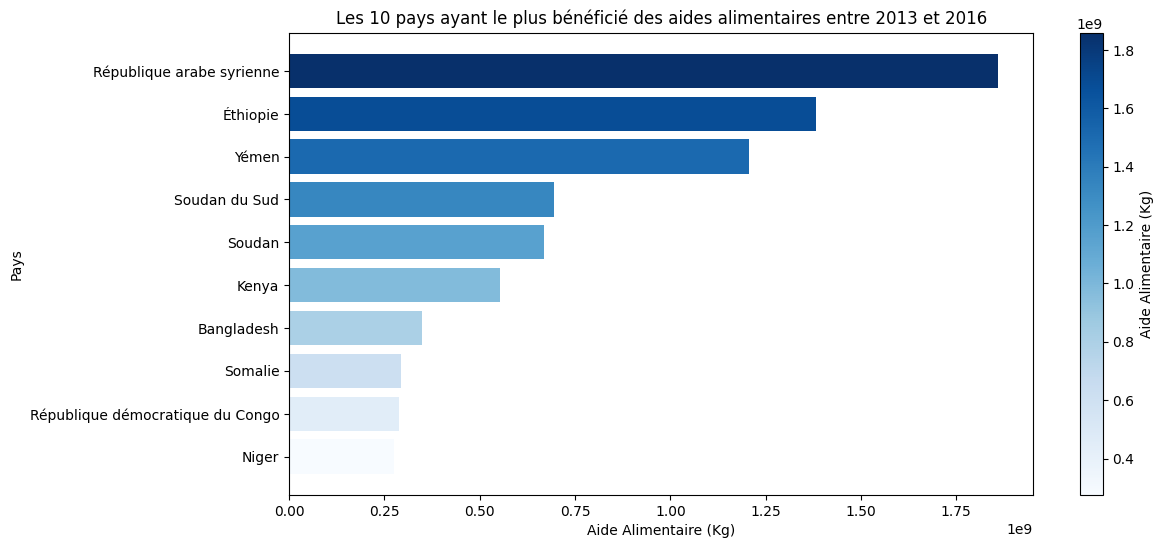

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Créez un DataFrame avec vos données
data = pd.DataFrame({
    'Zone': ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan', 'Kenya', 'Bangladesh', 'Somalie', 'République démocratique du Congo', 'Niger'],
    'Aide_alimentaire_Kg': [1858943000, 1381294000, 1206484000, 695248000, 669784000, 552836000, 348188000, 292678000, 288502000, 276344000]
})

# Trier les données en fonction de la quantité d'aide alimentaire (du plus élevé au plus faible)
data = data.sort_values(by='Aide_alimentaire_Kg', ascending=True)

# Extraire les noms de pays triés et les quantités d'aide alimentaire triées
pays = data['Zone']
aide_alimentaire = data['Aide_alimentaire_Kg']

# Créer un dégradé de bleu pour les couleurs
colors = plt.cm.Blues(np.linspace(0, 1, len(pays)))

# Créer un graphique à barres horizontal avec le dégradé de bleu
plt.figure(figsize=(12, 6))
bars = plt.barh(pays, aide_alimentaire, color=colors)
plt.xlabel('Aide Alimentaire (Kg)')
plt.ylabel('Pays')
plt.title('Les 10 pays ayant le plus bénéficié des aides alimentaires entre 2013 et 2016')

# Ajouter une barre de couleur pour le dégradé
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(aide_alimentaire), vmax=max(aide_alimentaire)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Aide Alimentaire (Kg)')

# Afficher le graphique
plt.show()


In [160]:
import plotly.express as px
import pandas as pd

# Votre DataFrame pivoté
data = {
    'Zone': ["République arabe syrienne", "Soudan", "Soudan du Sud", "Yémen", "Éthiopie"],
    2013: [563566000.0, 330230000.0, 196330000.0, 264764000.0, 591404000.0],
    2014: [651870000.0, 321904000.0, 450610000.0, 103840000.0, 586624000.0],
    2015: [524949000.0, 17650000.0, 48308000.0, 372306000.0, 203266000.0],
    2016: [118558000.0, None, None, 465574000.0, None]
}

df = pd.DataFrame(data)

# Créez un scatter plot
fig = px.scatter(df.melt(id_vars='Zone', var_name='Année', value_name='Valeur'),
                 x='Zone', y='Valeur', color='Année', title='Graphique de dispersion pour l\'évolution des données',
                 labels={'Valeur': 'Aide alimentaire (Kg)'}, hover_name='Zone')

# Personnalisez le graphique
fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers+lines'))

# Affichez le graphique
fig.show()


In [161]:
import plotly.express as px
import pandas as pd

# Votre DataFrame pivoté
data = {
    'Zone': ["République arabe syrienne", "Soudan", "Soudan du Sud", "Yémen", "Éthiopie"],
    2013: [563566000.0, 330230000.0, 196330000.0, 264764000.0, 591404000.0],
    2014: [651870000.0, 321904000.0, 450610000.0, 103840000.0, 586624000.0],
    2015: [524949000.0, 17650000.0, 48308000.0, 372306000.0, 203266000.0],
    2016: [118558000.0, None, None, 465574000.0, None]
}

df = pd.DataFrame(data)

# Créez un graphique à courbes
fig = px.line(df.melt(id_vars='Zone', var_name='Année', value_name='Valeur'),
              x='Année', y='Valeur', color='Zone', title='Evolution des 5 pays en aides alimentaires entre 2013 et 2016',
              labels={'Valeur': 'Aide alimentaire (Kg)'}, line_shape='linear')

# Supprimez les valeurs intermédiaires
fig.update_xaxes(type='category')

# Affichez le graphique
fig.show()


In [162]:
import plotly.express as px
import pandas as pd

# Données
pays = ["Autriche", "Belgique", "Turquie", "États-Unis d'Amérique", "Israël",
        "Irlande", "Italie", "Luxembourg", "Égypte", "Allemagne"]
disponibilite = [3770.0, 3737.0, 3708.0, 3682.0, 3610.0, 3602.0, 3578.0, 3540.0, 3518.0, 3503.0]

# Créer un DataFrame
data = pd.DataFrame({'Pays': pays, 'Disponibilité alimentaire (Kcal/personne/jour)': disponibilite})

# Définir une couleur pour l'Autriche (vert) et les autres pays (gris)
colors = ['green' if pays == 'Autriche' else 'gray' for pays in data['Pays']]

# Créer le graphique à barres vertical avec les noms des pays
fig = px.bar(data, x='Pays', y='Disponibilité alimentaire (Kcal/personne/jour)', 
             color=colors, text='Disponibilité alimentaire (Kcal/personne/jour)',
             labels={'Pays': '', 'Disponibilité alimentaire (Kcal/personne/jour)': 'Kcal/personne/jour'})

# Personnaliser le titre
fig.update_layout(title='Disponibilité alimentaire par pays (Kcal/personne/jour)',
                  xaxis_title='', yaxis_title='Disponibilité alimentaire (Kcal/personne/jour)')

# Afficher les noms des pays au-dessus des barres
fig.update_traces(textposition='outside')

# Afficher le graphique
fig.show()


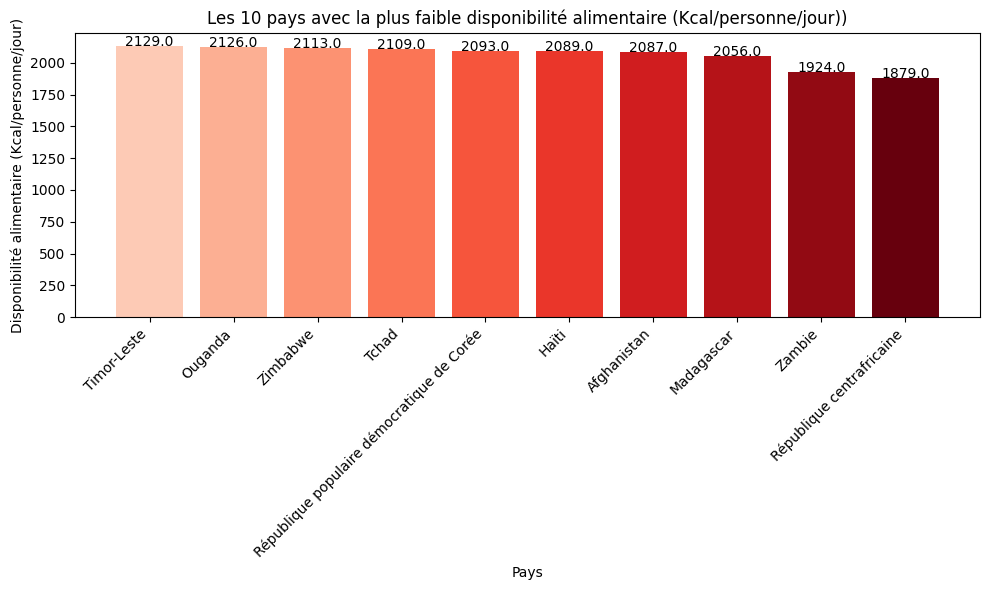

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# Données
pays = moins_dispo_alimentaire_10['Zone']
disponibilite = moins_dispo_alimentaire_10['Disponibilité alimentaire (Kcal/personne/jour)']

# Inverser l'ordre des données pour avoir le classement croissant
pays = pays[::-1]
disponibilite = disponibilite[::-1]

# Créer une palette de couleurs en dégradé du rouge foncé à l'orange clair
colors = plt.cm.Reds(np.linspace(0.2, 1, len(pays)))

# Créer le graphique à barres verticales avec le dégradé de couleur
plt.figure(figsize=(10, 6))
bars = plt.bar(pays, disponibilite, color=colors)

plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xlabel('Pays')
plt.title('Les 10 pays avec la plus faible disponibilité alimentaire (Kcal/personne/jour))')

# Ajouter des valeurs numériques au-dessus des barres
for bar, dispo in zip(bars, disponibilite):
    plt.text(bar.get_x() + bar.get_width()/2, dispo, f'{dispo:.1f}', ha='center', color='black', fontsize=10)
    
# Faire pivoter les étiquettes des pays pour une meilleure lisibilité
plt.xticks(rotation=45, ha="right")

# Afficher le graphique
plt.tight_layout()
plt.show()


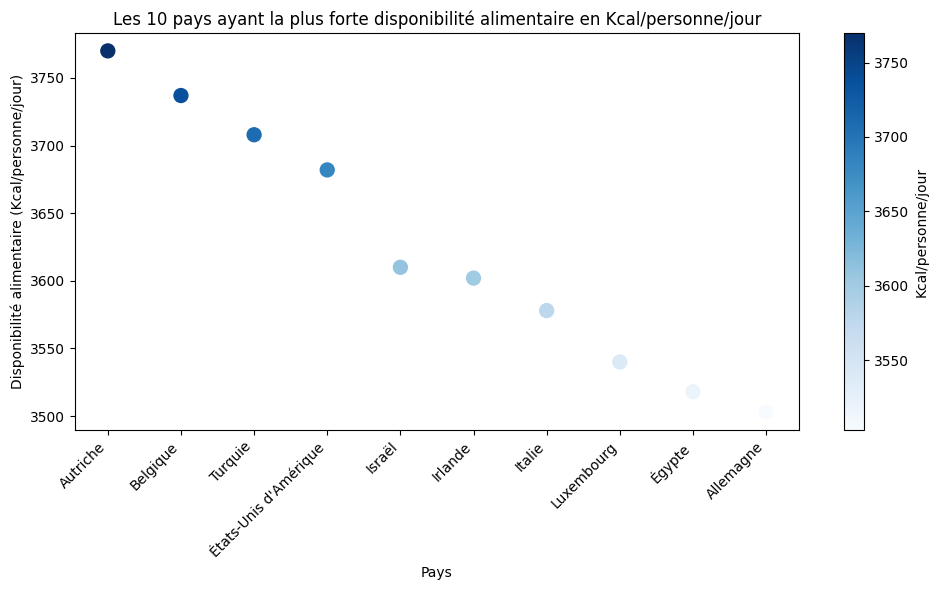

In [164]:
import matplotlib.pyplot as plt
import numpy as np

# Données
pays = ["Autriche", "Belgique", "Turquie", "États-Unis d'Amérique", "Israël",
        "Irlande", "Italie", "Luxembourg", "Égypte", "Allemagne"]
disponibilite = [3770.0, 3737.0, 3708.0, 3682.0, 3610.0, 3602.0, 3578.0, 3540.0, 3518.0, 3503.0]

# Créer une palette de couleurs en dégradé de bleu à vert
colors = plt.cm.Blues(np.linspace(0.2, 1, len(pays)))

# Créer le graphique de dispersion avec le dégradé de couleur
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pays, disponibilite, c=disponibilite, cmap='Blues', s=100)

plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xlabel('Pays')
plt.title('Les 10 pays ayant la plus forte disponibilité alimentaire en Kcal/personne/jour')

# Faire pivoter les étiquettes des pays pour une meilleure lisibilité
plt.xticks(rotation=45, ha="right")

# Ajouter un colorbar pour indiquer les valeurs associées aux couleurs
cbar = plt.colorbar(scatter)
cbar.set_label('Kcal/personne/jour')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [165]:
import plotly.express as px
import pandas as pd

# Données
pays = ["Autriche", "Belgique", "Turquie", "États-Unis d'Amérique", "Israël",
        "Irlande", "Italie", "Luxembourg", "Égypte", "Allemagne"]
disponibilite = [3770.0, 3737.0, 3708.0, 3682.0, 3610.0, 3602.0, 3578.0, 3540.0, 3518.0, 3503.0]

# Créer un DataFrame
data = pd.DataFrame({'Pays': pays, 'Disponibilité alimentaire (Kcal/personne/jour)': disponibilite})

# Définir une couleur pour l'Autriche, la Belgique et la Turquie (gris), et les autres pays (vert)
colors = ['gray' if pays in ['Autriche', 'Belgique', 'Turquie'] else 'green' for pays in data['Pays']]

# Créer le graphique à barres vertical avec les noms des pays
fig = px.bar(data, x='Pays', y='Disponibilité alimentaire (Kcal/personne/jour)', 
             color=colors, text='Disponibilité alimentaire (Kcal/personne/jour)',
             labels={'Pays': '', 'Disponibilité alimentaire (Kcal/personne/jour)': 'Kcal/personne/jour'})

# Personnaliser le titre
fig.update_layout(title='Les 10 pays ayant la plus forte disponibilité alimentaire (Kcal/personne/jour)',
                  xaxis_title='', yaxis_title='Disponibilité alimentaire (Kcal/personne/jour)')

# Afficher les noms des pays au-dessus des barres
fig.update_traces(textposition='outside')

# Masquer la légende
fig.update_layout(showlegend=False)

# Afficher le graphique
fig.show()


In [166]:
import plotly.express as px
import pandas as pd

# Exemple de données (veuillez remplacer cela par vos propres données)
annees = [2013, 2014, 2015, 2016, 2017, 2018]
proportions = [9.10, 8.77, 8.59, 8.70, 8.96, 9.36]

# Créer un DataFrame avec les données
data = pd.DataFrame({'Année': annees, 'Proportion de sous-nutrition (%)': proportions})

# Créer un graphique à barres avec Plotly
fig = px.bar(data, x='Année', y='Proportion de sous-nutrition (%)', text='Proportion de sous-nutrition (%)',
             title='Part de la population en sous-nutrition en Thaïlande entre 2013 et 2018')

# Personnaliser l'apparence du graphique
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Mettre en relief l'année 2017 en utilisant une couleur différente
fig.update_traces(marker_color=['lightgray', 'lightgray', 'lightgray', 'lightgray', 'blue', 'lightgray'])

fig.update_xaxes(title_text='Année')
fig.update_yaxes(title_text='Proportion de sous-nutrition (%)')

# Afficher le graphique
fig.show()


In [167]:
import plotly.express as px
import pandas as pd

# Exemple de données (veuillez remplacer cela par vos propres données)
annees = [2013, 2014, 2015, 2016, 2017, 2018]
proportions = [9.10, 8.77, 8.59, 8.70, 8.96, 9.36]

# Créer un DataFrame avec les données
data = pd.DataFrame({'Année': annees, 'Proportion de sous-nutrition (%)': proportions})

# Créer un graphique à barres avec Plotly
fig = px.bar(data, x='Année', y='Proportion de sous-nutrition (%)', text='Proportion de sous-nutrition (%)',
             title='Proportion de sous-nutrition en Thaïlande (2013-2018)')

# Personnaliser l'apparence du graphique
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_xaxes(title_text='Année')
fig.update_yaxes(title_text='Proportion de sous-nutrition (%)')

# Afficher le graphique
fig.show()


In [168]:
import plotly.express as px

# Créez un dictionnaire de données à partir des pourcentages que vous avez fournis
data = {
    'Catégorie': ['Exportations', 'Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations'],
    'Pourcentage': [83.41, 5.95, 5.0, 2.88, 0.0, 0.0, 6.88]
}

# Créez un DataFrame Pandas à partir du dictionnaire de données
df = pd.DataFrame(data)

# Créez un graphique à secteurs (camembert) avec Plotly
fig = px.pie(df, names='Catégorie', values='Pourcentage', title="Répartition de la production de manioc en 2017")

# Affichez le graphique
fig.show()


In [169]:
import plotly.express as px
import pandas as pd

# Créez un DataFrame à partir de vos nouvelles données
data = {
    "Produit": [
        "Manioc", "Riz (Eq Blanchi)", "Sucre Eq Brut", "Fruits, Autres", "Ananas", 
        "Crustacés", "Huile de Palme", "Viande de Volailles", "Bananes", "Maïs"
    ],
    "Balance Commerciale (milliards €)": [
        2.3964e10, 6.81e9, 6.437e9, 2.41e9, 1.44e9, 
        6.23e8, 6.02e8, 5.25e8, 4.26e8, 3.85e8
    ]
}

df = pd.DataFrame(data)

# Créez un graphique à barres empilées avec Plotly
fig = px.bar(df, x='Produit', y='Balance Commerciale (milliards €)',
             title='Balance Commerciale des 10 produits les plus exportés',
             labels={'Balance Commerciale (milliards €)': 'Balance Commerciale (milliards €)'},
             color_discrete_sequence=['royalblue'])

fig.update_layout(barmode='relative')
fig.show()


In [170]:
import plotly.express as px
import pandas as pd

# Créez un DataFrame à partir de vos données
data = {
    "Produit": [
        "Blé", "Soja", "Lait - Excl Beurre", "Orge", "Pommes de Terre", 
        "Pommes", "Raisin", "Oranges, Mandarines", "Poissons Pelagiques", "Tomates"
    ],
    "Balance Commerciale (milliards €)": [
        -1.881e9, -1.67e9, -1.041e9, -3.35e8, -2.36e8, 
        -1.13e8, -1.01e8, -9.7e7, -7e7, -6.7e7
    ]
}

df = pd.DataFrame(data)

# Créez un graphique de barres avec Plotly
fig = px.bar(df, x='Balance Commerciale (milliards €)', y='Produit', orientation='h', text='Balance Commerciale (milliards €)')
fig.update_traces(texttemplate='%{text:.3s}', textposition='inside')
fig.update_layout(
    title='Balance Commerciale par Produit',
    xaxis_title='Balance Commerciale (milliards €)',
    yaxis_title='Produit'
)
fig.show()
